<a href="https://colab.research.google.com/github/s0miya/Radiology-Report-Classification/blob/main/Radiology_Reports_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install libraries
!pip3 install -U fastai >/dev/null
!pip3 install -U fastcore >/dev/null
!pip3 install -U xmltodict >/dev/null
!pip3 install -U torchvision >/dev/null


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.3.1 which is incompatible.


In [ ]:
!pip install -U torch==2.3.0 >/dev/null

In [ ]:
!curl -s https://openi.nlm.nih.gov/imgs/collections/NLMCXR_reports.tgz | tar xvz >/dev/null

In [ ]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.4.0+cu100 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.

In [ ]:
import glob
import xmltodict
from fastai.basics import *
from fastai.text.all import *

# suppress warnings from the output
import warnings
warnings.filterwarnings('ignore')


def xml_parse(f):
    with open(f) as xml:
        report_dict = xmltodict.parse(xml.read())
    xml.close()
    return report_dict

def get_label(report):
    label = L(report['eCitation']['MeSH']['major'])
    return 'normal' if label[0].lower() == 'normal' else 'abnormal'

def get_text(report):
    text_dict = {}
    text_dict['id'] = report['eCitation']['IUXRId']['@id']
    text = report['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText']
    findings = text[2]['#text'] if '#text' in text[2] else ''
    text_dict['findings'] = findings
    impression = text[3]['#text'] if '#text' in text[3] else ''
    text_dict['impression'] = impression
    text_dict['full-text'] = ' '.join([findings, impression])
    return text_dict

def process_report(report):
    label = get_label(report)
    report_dict = get_text(report)
    report_dict['label'] = label
    return report_dict

fps = L(glob.glob('/content/ecgen-radiology/*'))
reports = fps.map(xml_parse)
reports_df = pd.DataFrame(reports.map(process_report)).set_index('id').sort_index()
print('# of reports:', reports_df.shape[0])
print()
reports_df.head()

# of reports: 3955



,findings,impression,full-text,label
id,,,,
1,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,normal
10,"The cardiomediastinal silhouette is within normal limits for size and contour. The lungs are normally inflated without evidence of focal airspace disease, pleural effusion, or pneumothorax. Stable calcified granuloma within the right upper lung. No acute bone abnormality..",No acute cardiopulmonary process.,"The cardiomediastinal silhouette is within normal limits for size and contour. The lungs are normally inflated without evidence of focal airspace disease, pleural effusion, or pneumothorax. Stable calcified granuloma within the right upper lung. No acute bone abnormality.. No acute cardiopulmonary process.",abnormal
100,Both lungs are clear and expanded. Heart and mediastinum normal.,No active disease.,Both lungs are clear and expanded. Heart and mediastinum normal. No active disease.,normal
1000,There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying the posterior left 5th rib may represent focal airspace disease. No pleural effusion or pneumothorax. No acute bone abnormality.,1. Increased opacity in the right upper lobe with XXXX associated atelectasis may represent focal consolidation or mass lesion with atelectasis. Recommend chest CT for further evaluation. 2. XXXX opacity overlying the left 5th rib may represent focal airspace disease.,There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying the posterior left 5th rib may represent focal airspace disease. No pleural effusion or pneumothorax. No acute bone abnormality. 1. Increased opacity in the right upper lobe with XXXX associated atelectasis may represent focal consolidation or mass lesion with atelectasis. Recommend chest CT for further evaluation. 2. XXXX opacity overlying the left 5th rib may rep...,abnormal
1001,Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal.,Diffuse fibrosis. No visible focal acute disease.,Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal. Diffuse fibrosis. No visible focal acute disease.,abnormal


In [ ]:
reports_df.sample(5)

,findings,impression,full-text,label
id,,,,
2694,"The heart is normal in size and contour. The lungs are clear, without evidence of infiltrate. There is no pneumothorax or effusion.",No acute cardiopulmonary disease.,"The heart is normal in size and contour. The lungs are clear, without evidence of infiltrate. There is no pneumothorax or effusion. No acute cardiopulmonary disease.",normal
3867,"The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings.",No acute cardiopulmonary findings.,"The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings. No acute cardiopulmonary findings.",normal
2828,Heart size and mediastinal contour are normal. Pulmonary vascularity is normal. Lungs are hyperexpanded but clear. No pleural effusions or pneumothoraces. Degenerative changes in the thoracic spine.,Findings suggestive of emphysema. No acute cardiopulmonary process.,Heart size and mediastinal contour are normal. Pulmonary vascularity is normal. Lungs are hyperexpanded but clear. No pleural effusions or pneumothoraces. Degenerative changes in the thoracic spine. Findings suggestive of emphysema. No acute cardiopulmonary process.,abnormal
39,The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.,No active disease.,The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal. No active disease.,abnormal
643,,Heart size normal and lungs are clear. Old healed left lateral rib fractures.,Heart size normal and lungs are clear. Old healed left lateral rib fractures.,abnormal


Abnormal: 2564
Normal: 1391



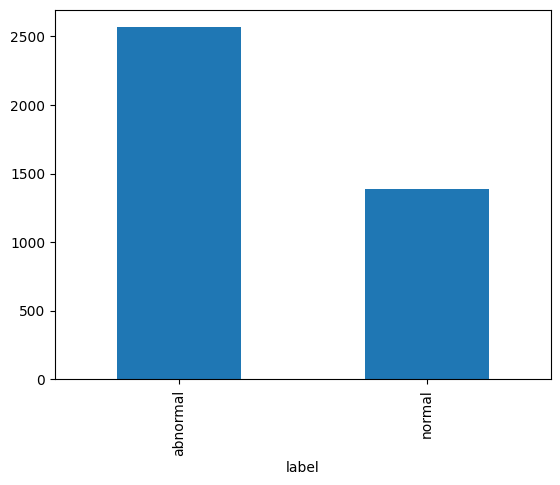

In [ ]:
label_counts = reports_df.label.value_counts()
print('Abnormal:', label_counts['abnormal'])
print('Normal:', label_counts['normal'])
print()
label_counts.plot.bar();

Test set size: 594
Abnormal: 385
Normal: 209



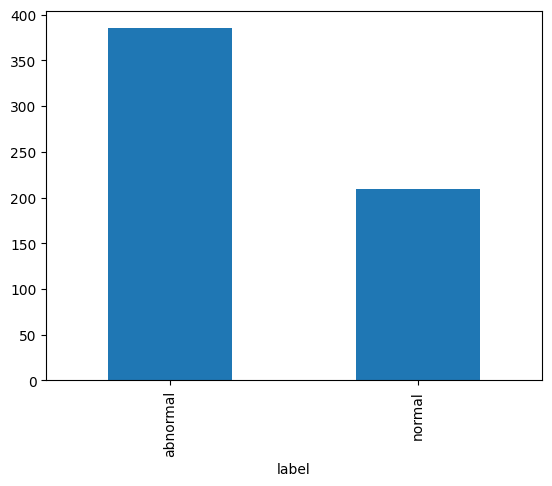

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

train_val, test_df = train_test_split(reports_df, test_size=0.15, stratify=reports_df.label.values)
print('Test set size:', test_df.shape[0])
test_counts = test_df.label.value_counts()
print('Abnormal:', test_counts['abnormal'])
print('Normal:', test_counts['normal'])
print()
test_counts.plot.bar();

In [ ]:
pip install wheel setuptools pip --upgrade

  Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
fastdownload 0.0.7 requires fastcore>=1.3.26, but you have fastcore 1.3.1 which is incompatible.


In [ ]:
!pip install --no-cache-dir spacy==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 93.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 182.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 367.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 254.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 322.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 kB 355.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 126.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 322.3 MB/s eta 0:00:00
  Preparing

In [ ]:
!pip3 install -U spacy==2.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl.metadata (13 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl.metadata (2.3 kB)
Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
Using cached srsly-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (369 kB)
Using cached thinc-7.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached wasabi-0.10.1-py3-none-any.whl

In [ ]:
import spacy
from fastai.text.all import *

spacy = WordTokenizer()
text = train_val.iloc[0]['full-text']
print('Original text:')
print(text)
print()
tkns = first(spacy([text]))
print('After word tokenization (only showing first 10 tokens):')
print(coll_repr(tkns))

Original text:
The XXXX examination consists of frontal and lateral radiographs of the chest. The cardiac silhouette is not enlarged. There has been apparent interval increase in low density convexity at the left cardiophrenic XXXX. Calcified granuloma is again seen in the right upper lobe. There is no consolidation, pleural effusion or pneumothorax. Increased size of density in the left cardiophrenic XXXX. Primary differential considerations include increased size of prominent epicardial fat, pericardial mass, pleural mass or cardiac aneurysm. CT chest with contrast is recommended. These findings and recommendations were discussed XXXX. XXXX by Dr. XXXX XXXX telephone at XXXX p.m. XXXX/XXXX. Dr. XXXX<XXXX>technologist receipt of the results.

After word tokenization (only showing first 10 tokens):
(#126) ['The','XXXX','examination','consists','of','frontal','and','lateral','radiographs','of'...]


In [ ]:
tkn = Tokenizer(spacy)
toks = tkn(text)
print(coll_repr(toks, 15))

(#164) ['xxbos','xxmaj','the','xxrep','4','x','examination','consists','of','frontal','and','lateral','radiographs','of','the'...]


In [ ]:
txts = L(train_val['full-text'].to_list())
toks = txts.map(tkn)
num = Numericalize()
num.setup(toks)
coll_repr(num.vocab, 20)

"(#1192) ['xxunk','xxpad','xxbos','xxeos','xxfld','xxrep','xxwrep','xxup','xxmaj','.','no','the','is','are','normal',',','4','x','of','and'...]"

In [ ]:
nums = num(toks[0][:14])
print(nums)
print(' '.join(num.vocab[i] for i in nums))

TensorText([  2,   8,  11,   5,  16,  17, 162, 314,  18, 178,  19,  89, 261,
             18])
xxbos xxmaj the xxrep 4 x examination consists of frontal and lateral radiographs of


In [ ]:
dls_lm = TextDataLoaders.from_df(train_val, valid_pct=0.3, seed=42, text_col='full-text', is_lm=True)
learn_lm = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()]).to_fp16()

# Train the final layers of the network
learn_lm.fit_one_cycle(1, 2e-2)
print("\nPart 1/2 complete.\n")

# Unfreeze and train some more
learn_lm.unfreeze()
learn_lm.fit_one_cycle(10, 2e-3)
print("\nPart 2/2 complete.\n")

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.233525,2.231946,0.522743,9.317977,00:08



Part 1/2 complete.



epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.357015,1.982583,0.567825,7.261472,00:07
1,2.192168,1.764008,0.606750,5.835783,00:06
2,1.998803,1.593909,0.638988,4.922957,00:05
3,1.811843,1.502301,0.659334,4.492014,00:06
4,1.698298,1.453167,0.671454,4.276639,00:06
5,1.576687,1.410082,0.681074,4.096289,00:06
6,1.462446,1.395248,0.687873,4.035976,00:06
7,1.369889,1.381508,0.691615,3.980901,00:06
8,1.305286,1.380483,0.693453,3.976821,00:06
9,1.260017,1.379744,0.693595,3.973884,00:07



Part 2/2 complete.



In [ ]:
torch.save(learn_lm.dls.vocab, 'vocab.pkl')
learn_lm.save_encoder('fine-tuned-enc')
print('Saved.')

Saved.


In [ ]:
!wget -q https://github.com/wfwiggins/RSNA-NLP-2020/blob/master/lm_data.zip?raw=true
!unzip -o lm_data.zip?raw=true -d /content/ >/dev/null
!rm lm_data.zip?raw=true

print('Success!')

Success!


In [ ]:
training_target = 'full-text' #@param ["full-text", "findings", "impression"]
validation_pct = 0.3 #@param {type:"slider", min:0.1, max:0.4, step:0.05}
fine_tuned_LM = True #@param {type:"boolean"}

lm_vocab = torch.load('vocab.pkl')
dls_cls = TextDataLoaders.from_df(train_val, valid_pct=validation_pct, seed=42, text_col=training_target, label_col='label', text_vocab=lm_vocab)
dls_cls.show_batch(max_n=3)

,text,category
0,xxbos xxmaj chest xxmaj comparison : xxmaj there is a xxunk cm diameter masslike density over the lingula partial obscuration left cardiac xxrep 4 x . xxmaj there may be some ill - defined opacity in the right mid and lower lung zone . xxmaj no pleural effusion is seen . xxmaj the heart is borderline enlarged . xxmaj the aorta is dilated and tortuous . xxmaj arthritic changes of the spine are present . xxmaj pelvis and left hip xxmaj there is an xxunk and rotated fracture through the neck of the femur on the left . xxmaj no xxunk fracture is seen . xxmaj arthritic changes are present in the lower lumbar spine . xxmaj large amount of stool and xxrep 4 x obscures portions of the pelvis . xxmaj femur xxmaj the femoral images do not xxrep 4 x the area of the hip fracture . xxmaj,abnormal
1,"xxbos xxmaj chest : 2 images . xxmaj heart size is normal . xxmaj mediastinal contours are maintained . xxmaj there is a mild pectus excavatum deformity . xxmaj the lungs are clear of focal infiltrate . xxmaj there is no evidence for pleural effusion or pneumothorax . xxmaj no convincing acute bony findings . xxmaj right shoulder : 3 images . xxmaj there has been xxrep 4 x and screw fixation of the xxunk right clavicle . xxmaj the lateral most screw is fractured . xxmaj this is age - indeterminate as no prior studies are available for comparison . xxmaj otherwise , the surgical xxrep 4 x appears intact . xxmaj the humeral head is seen within the glenoid , without evidence for dislocation . xxmaj no bony fractures are seen . xxmaj the visualized right ribs appear intact . xxmaj right clavicle : 2 images . xxmaj",abnormal
2,"xxbos xxmaj the heart size and pulmonary vascularity appear within normal limits . xxmaj the lungs are free of focal airspace disease . xxmaj no pleural effusion or pneumothorax is seen . xxmaj osteopenia and xxrep 4 x deformities , degenerative changes and scoliosis are present in the thoracic spine . xxmaj calcified granuloma is present in the left upper lobe . xxmaj on xxrep 4 x xxunk of a xxrep 4 x scan xxrep 4 x xxrep 4 x / xxrep 4 x , several nodules were identified . a nodule is seen in the right middle lobe which corresponds with one of the nodules present on the previous xxup ct scan . 1 . xxmaj right middle lobe lung nodule . xxmaj corresponds to one of xxunk seen on the previous xxrep 4 x scan . xxmaj the other nodules seen on the chest xxup ct scan are",abnormal


In [ ]:
learn_cls = text_classifier_learner(dls_cls, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()
if fine_tuned_LM: learn_cls.load_encoder('fine-tuned-enc')
learn_cls.fit_one_cycle(1, 2e-2)
print("\nPart 1/4 complete.\n")

# Unfreezing and training a little more...
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))
print("\nPart 2/4 complete.\n")

# Unfreezing and training a little more, again...
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))
print("\nPart 3/4 complete.\n")

# Now let's unfreeze the whole model and finish training.
learn_cls.unfreeze()
learn_cls.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))
print("\nPart 4/4 complete.")

epoch,train_loss,valid_loss,accuracy,time
0,0.524877,0.355132,0.919643,00:04



Part 1/4 complete.



epoch,train_loss,valid_loss,accuracy,time
0,0.485125,0.226136,0.943452,00:05



Part 2/4 complete.



epoch,train_loss,valid_loss,accuracy,time
0,0.360608,0.149177,0.959325,00:04



Part 3/4 complete.



epoch,train_loss,valid_loss,accuracy,time
0,0.287754,0.132322,0.965278,00:04



Part 4/4 complete.


In [ ]:
test_items = test_df[[training_target, 'label']].copy()
test_items.columns = ['text', 'label']
dl_test = learn_cls.dls.test_dl(test_items, with_labels=True)
interp = ClassificationInterpretation.from_learner(learn_cls, dl=dl_test)
interp.print_classification_report()

              precision    recall  f1-score   support

    abnormal       0.97      0.97      0.97       385
      normal       0.95      0.95      0.95       209

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594



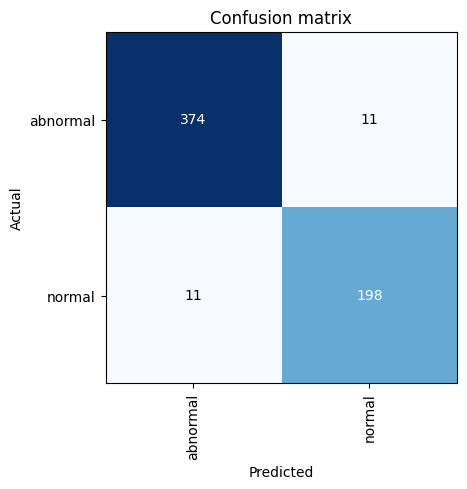

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
def detokenize(t):
    spec_toks = "xxunk xxpad xxbos xxeos xxfld xxrep xxwrep xxup xxmaj 4 x".split()
    return ' '.join([o for o in t.split() if o not in spec_toks])

@typedispatch
def plot_top_losses(x: TensorText, y:TensorCategory, samples, outs, raws, losses, trunc_at=150, **kwargs):
    rows = get_empty_df(len(samples))
    samples = L((s[0].truncate(trunc_at),*s[1:]) for s in samples)
    for i,l in enumerate(['input', 'target']):
        rows = [b.show(ctx=c, label=l, **kwargs) for b,c in zip(samples.itemgot(i),rows)]
    outs = L(o + (TitledFloat(r.max().item()), TitledFloat(l.item())) for o,r,l in zip(outs, raws, losses))
    for i,l in enumerate(['predicted', 'probability', 'loss']):
        rows = [b.show(ctx=c, label=l, **kwargs) for b,c in zip(outs.itemgot(i),rows)]
    df = pd.DataFrame(rows)
    df['input'] = df['input'].apply(detokenize)
    display_df(df)


interp.plot_top_losses(3)

,input,target,predicted,probability,loss
0,"the examination consists of frontal and lateral radiographs of the chest . the cardiomediastinal contours are within normal limits . pulmonary vascularity is within normal limits . no focal consolidation , pleural effusion , or pneumothorax identified . deformity of the right clavicle related to remote is again seen . visualized upper abdomen grossly unremarkable . no evidence of acute cardiopulmonary process .",normal,abnormal,0.986929178237915,4.407764911651611
1,"the heart , pulmonary and mediastinum are within normal limits . there is no pleural effusion or pneumothorax . there is no focal air space opacity to suggest a pneumonia . there is no pulmonary nodule identified . there is a left humerus prosthesis demonstrated . no acute cardiopulmonary disease . no evidence for metastatic disease by radiographic evaluation .",normal,abnormal,0.9829546809196472,4.339303493499756
2,"heart , mediastinum , , bony structures and lung are unremarkable . no radiographic evidence of acute cardiopulmonary disease",abnormal,normal,0.9878177046775818,4.071879863739014


In [ ]:
text = 'Normal heart size' #@param {type: "string"}
words_per_sentence = 18 #@param {type: "integer"}
num_sentences = 2 #@param {type: "integer"}
ULMFiT = True #@param {type: "boolean"}

print('Generating predictions...')
if ULMFiT:
    preds = [learn_lm.predict(text, words_per_sentence, temperature=0.75) for _ in range(num_sentences)]
else:
    learn_lm_new = language_model_learner(dls_lm, AWD_LSTM)
    preds = [learn_lm_new.predict(text, words_per_sentence, temperature=0.75) for _ in range(num_sentences)]
print()
for i, pred in enumerate(preds): print(f'Sentence {i + 1}: {pred}')

Generating predictions...



Sentence 1: Normal heart size and mediastinal contours . No focal airspace consolidation . No pleural effusion or pneumothorax .
Sentence 2: Normal heart size . Stable mediastinal silhouette . No focal airspace consolidation . No pneumothorax or pleural effusion
